<a href="https://colab.research.google.com/github/colalai/CGU_deep_learning/blob/main/ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
(xr,yr), (xt,yt)= keras.datasets.mnist.load_data()

In [3]:
xr.shape, yr.shape, xt.shape, yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
x= xr[0]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

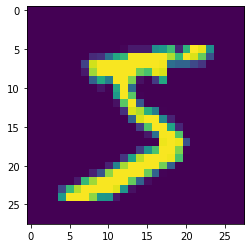

In [5]:
import matplotlib.pyplot as pl
pl.imshow(x)

In [6]:
y = yr[0]
print('y = '+str(y))

y = 5


In [7]:

xr1= xr.reshape(-1, 28*28) 
xt1= xt.reshape(-1, 28*28) 

In [13]:
xr1= xr.reshape(-1,28*28) /255
xt1= xt.reshape(-1,28*28) /255


aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(170, activation= 'relu'),   
    keras.layers.Dense(70, activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 22, 
           batch_size= 100)

aModel.evaluate(xt1, yt)

Epoch 1/22
600/600 [==============================] - 4s 6ms/step - loss: 0.2796 - accuracy: 0.9193
Epoch 2/22
600/600 [==============================] - 3s 6ms/step - loss: 0.1161 - accuracy: 0.9646
Epoch 3/22
600/600 [==============================] - 3s 6ms/step - loss: 0.0775 - accuracy: 0.9765
Epoch 4/22
600/600 [==============================] - 3s 6ms/step - loss: 0.0599 - accuracy: 0.9819
Epoch 5/22
600/600 [==============================] - 3s 6ms/step - loss: 0.0454 - accuracy: 0.9857
Epoch 6/22
600/600 [==============================] - 3s 6ms/step - loss: 0.0370 - accuracy: 0.9887
Epoch 7/22
600/600 [==============================] - 4s 6ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 8/22
600/600 [==============================] - 4s 6ms/step - loss: 0.0248 - accuracy: 0.9922
Epoch 9/22
600/600 [==============================] - 4s 6ms/step - loss: 0.0198 - accuracy: 0.9937
Epoch 10/22
600/600 [==============================] - 3s 6ms/step - loss: 0.0169 - accuracy: 0.9944

[0.12972748279571533, 0.9821000099182129]

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 170)               133450    
                                                                 
 dense_13 (Dense)            (None, 70)                11970     
                                                                 
 dense_14 (Dense)            (None, 10)                710       
                                                                 
Total params: 146,130
Trainable params: 146,130
Non-trainable params: 0
_________________________________________________________________


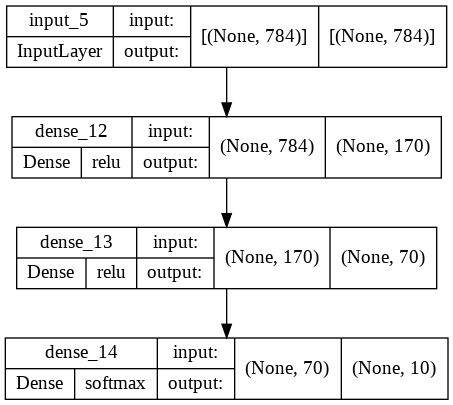

In [14]:
aModel.summary()

keras.utils.plot_model(aModel, 
    show_shapes= True, 
    show_layer_activations= True)